In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

In [5]:
current_dir = os.getcwd()
print(f"Diretório de trabalho atual: {current_dir}")

caminho_relativo = r'..\..\data\dados_balanceados.csv'

if os.path.exists(caminho_relativo):
    dados = pd.read_csv(caminho_relativo)
    print(dados.head())
else:
    print(f"Arquivo não encontrado: {caminho_relativo}")

Diretório de trabalho atual: c:\Users\herbe\Desktop\JaPodeVoar\app\models
  Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay
0      CO    1487         MCO       IAH          1   715     153      0
1      UA      17         GRR       ORD          3   480      62      1
2      WN     398         LAS       LAX          5  1000      70      1
3      WN    1633         LAS       TUS          3   385      75      0
4      CO    1131         EWR       DFW          2   405     244      0


In [38]:
from sklearn.preprocessing import LabelEncoder


# Criar instâncias do LabelEncoder
le_airline = LabelEncoder()
le_airportfrom = LabelEncoder()
le_airportto = LabelEncoder()

# Aplicar a codificação de rótulos nas colunas categóricas
dados['Airline'] = le_airline.fit_transform(dados['Airline'])
dados['AirportFrom'] = le_airportfrom.fit_transform(dados['AirportFrom'])
dados['AirportTo'] = le_airportto.fit_transform(dados['AirportTo'])

# Verificar a transformação
print(dados.head())

   Airline  Flight  AirportFrom  AirportTo  DayOfWeek  Time  Length  Delay
0        4    1487          172        134          1   715     153      0
1       13      17          119        207          3   480      62      1
2       15     398          152        153          5  1000      70      1
3       15    1633          152        279          3   385      75      0
4        4    1131           96         80          2   405     244      0


In [39]:
# Separar target dos atributos
x = dados.iloc[:, 0:6] # Atributos 
y = dados.iloc[:, 7] # Taget

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

knn = KNeighborsClassifier(n_neighbors = 5)
clf = RandomForestClassifier(n_estimators = 200, max_depth=2, random_state=0)
logreg = LogisticRegression()
mlp = MLPClassifier(learning_rate_init=0.001, hidden_layer_sizes=(5,10), activation='relu')


In [42]:
def mymodel(model):
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  print(accuracy_score(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)
  plt.show()

0.4773834566058221
              precision    recall  f1-score   support

           0       0.48      0.49      0.49     36816
           1       0.48      0.46      0.47     36869

    accuracy                           0.48     73685
   macro avg       0.48      0.48      0.48     73685
weighted avg       0.48      0.48      0.48     73685



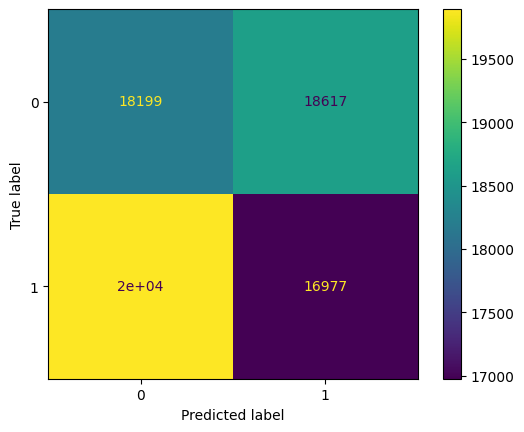

In [45]:
mymodel(knn)

0.5647282350546244
              precision    recall  f1-score   support

           0       0.56      0.63      0.59     36816
           1       0.57      0.50      0.54     36869

    accuracy                           0.56     73685
   macro avg       0.57      0.56      0.56     73685
weighted avg       0.57      0.56      0.56     73685



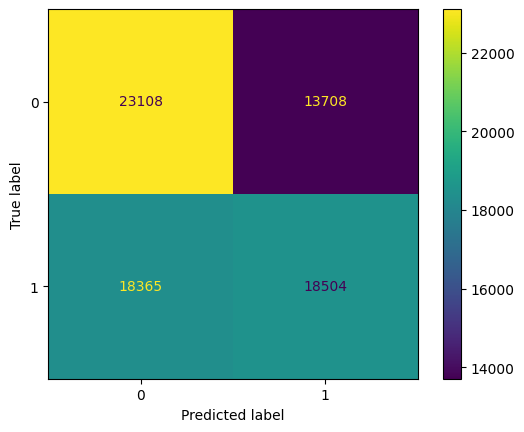

In [44]:
mymodel(clf)

0.5437741738481373
              precision    recall  f1-score   support

           0       0.55      0.48      0.51     36816
           1       0.54      0.61      0.57     36869

    accuracy                           0.54     73685
   macro avg       0.54      0.54      0.54     73685
weighted avg       0.54      0.54      0.54     73685



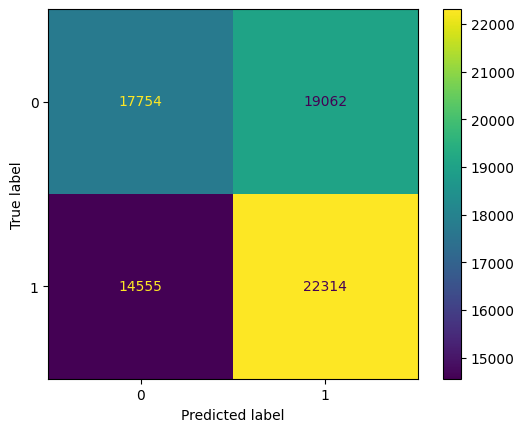

In [46]:
mymodel(logreg)

0.4996946461287915
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     36816
           1       1.00      0.00      0.00     36869

    accuracy                           0.50     73685
   macro avg       0.75      0.50      0.33     73685
weighted avg       0.75      0.50      0.33     73685



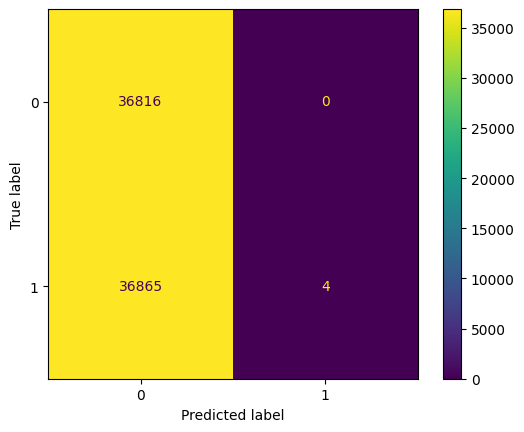

In [47]:
mymodel(mlp)